# ANOVA

## Introduction

One-way ANOVA compares the means of three or more groups, assuming that all values are sampled from Gaussian populations. It is called one-way ANOVA, because the groups are categorized by one scheme (e.g. treatment). Two-way ANOVA is used when the data are categorized by two schemes (e.g. treatment and gender).

![flowchart for selecting the right ANOVA function](https://pingouin-stats.org/_images/flowchart_one_way_ANOVA.svg)

The main problem with computing several t tests is multiple comparisons. As you include more groups in the study, you increase the chance of obtaining one or more P values less than 0.05 just by chance. If the null hypothesis were true, there would be a 5% chance that each particular t test would yield a P value less than 0.05, but with three comparisons, the chance that any one (or more) of the values would be less than 0.05 would be far higher that 5%

One-way ANOVA can be seen as a regression model with a **single categorical predictor**. This predictor usually has **2+ categories**. In fact ANOVA compares the fit of several models to the data, and this can be done with regression techniques. The answers will be fundamentally identical, but they will look very different.

Comparing three or more means with one-way ANOVA can be viewed as comparing the fit of the data to two different models:

- null hypothesis; all populations share the same mean, and nothing but random sampling causes any differences between sample means
- alternative hypothesis; all populations do not share the same means, at least one population has a mean different than the rest.

### Interpreting a P value

One-way ANOVA compares all the groups at once. The null hypothesis is that all groups were sampled from populations with identical means, i.e. there is no difference between means: $ \overline{x_1} = \overline{x_2} = ... = \overline{x_i}$.

The P value answers the question
>if the null hypothesis were true, what is the chance of randomly picking samples with mean values as different (or more different) than those observed in the study?

With a P value of 0.004, there is only 0.4% chance that the different means would be as far apart as actually observed or even further apart.

### How it works

The classic ANOVA is very powerful when the groups are **normally distributed** and have **equal variances** (homoscedasticity). It does not require all the samples to have the same number of values, though the two assumptions (Gaussian population and equal variance) matter much more when the sample size varies a lot between groups. When the groups have unequal variances, it is best to use the _Welch ANOVA_ that better controls for type I error.

The main idea of ANOVA is to partition the variance (sums of squares) into several components. For example, in one-way ANOVA:

$$ \text{SS}_\text{total} = \text{SS}_\text{effect} + \text{SS}_\text{error} $$
$$ \text{SS}_\text{total} = \sum_i \sum_j (Y_{ij} - \overline{Y})^2 $$
$$ \text{SS}_\text{effect} = \sum_i n_i (\overline{Y_i} - \overline{Y})^2 $$
$$ \text{SS}_\text{error} = \sum_i \sum_j (Y_{ij} - \overline{Y}_i)^2 $$

where $ i=1,...,r; j=1,...,n_i $, $r$ is the number of groups, and $n_i$ the number of observations for the $i$ th group.

The F-statistics is then defined as:
$$ F^* = \frac{\text{MS}_{\text{effect}}}{\text{MS}_{\text{error}}} = \frac{\text{SS}_{\text{effect}} / (r - 1)}{\text{SS}_{\text{error}} / (n_t - r)} $$

and the P-value can be calculated using a F-distribution with $r-1, n_t-1$ degrees of freedom.

The default effect size reported is the **partial eta-square**, which, for one-way ANOVA is the same as eta-square and generalized eta-square:
$$ \eta_p^2 = \frac{\text{SS}_{\text{effect}}}{\text{SS}_{\text{effect}} + \text{SS}_{\text{error}}}$$
It is interpreted in the same way as $R^2$. For example, an $\eta^2$ of 0.053, only 5.3% of the total variability is the result of differences within the groups.

Of note, the concept of one- and two-tailed P values does not apply in ANOVA. Because the means of the groups can be in many different orders, the P values has many tails.

## Partitioning the sum of squares

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

This is the analysis of the variance: _comparing the ratio of systematic variance to unsystematic variance_ using sum of squares (SS), between the groups `SSB` and the variance within the group `SSW` (i.e. error, residual), with $ \text{SSW} + \text{SSB} = \text{SST} $.

When F increase, then the variance between the group (SSB) is bigger than within the group (SSW).

The group means are represented as deviations from the grand mean by grouping their coefficients under a single term $ y_{ij} = \mu_{grand} + \tau_j + \epsilon_{ij} $

One example of one-way ANOVA comparing 3 groups:  

| Hypothesis  | Scatter from | SS    | Var    | R²    |
| ----------- | ------------ | -----:| ------:| ----- |
| Null        | Grand mean   | 17.38 | 100.0% |       |
| Alternative | Group mean   | 16.45 |  94.7% |       |
| Difference  |              |  0.93 |   5.3% | 0.053 |

Of all the variation, 94.7% is the result of variation within the groups, leaving 5.3% of the total variation as the result of differences between the group means. **The sum of squares resulting from the treatment and the sum of sqaures within the groups always add up to the total sum of squares.**

| Source variation | SS    | DF  | MS    | F ratio | P value |
| ----------------:| -----:| ---:| ----- | ------  | ------- |
|   Between groups |  0.93 | 2   | 0.460 |  5.69   |  0.004  |
| + Within groups  | 16.45 | 202 | 0.081 |         |         |
| =          Total | 17.38 | 204 |       |         |         |

For the total, there are 205 values and only one parameter (grand mean) estimated, so $ \text{DF} = 204$. For the SSW, 3 parameters were fit (the mean of each group), so $ \text{DF} = 205 - 3 = 202 $. If the null hypothesis were true, F would be likely to have a value close to 1.

In [47]:
dfn, dfd = 2, 202
F = .460 / .081

print(f"P values computed from the F ratio distribution: {1 - stats.f(dfn, dfd).cdf(F):.4f}")

P values computed from the F ratio distribution: 0.0040


The low P value means that the differences among group means would be very unlikely if in fact all the population means were equal.  
The low R² means that the differences among group means are only a tiny fraction of the overall variability.

## Practical example of one-way ANOVA

In [14]:
# 0. Load an example dataset comparing pain threshold as a function of hair color
data = pg.read_dataset('anova')
pg.print_table(data, tablefmt='github')

|   Subject | Hair color     |   Pain threshold |
|-----------|----------------|------------------|
|         1 | Light Blond    |               62 |
|         2 | Light Blond    |               60 |
|         3 | Light Blond    |               71 |
|         4 | Light Blond    |               55 |
|         5 | Light Blond    |               48 |
|         6 | Dark Blond     |               63 |
|         7 | Dark Blond     |               57 |
|         8 | Dark Blond     |               52 |
|         9 | Dark Blond     |               41 |
|        10 | Dark Blond     |               43 |
|        11 | Light Brunette |               42 |
|        12 | Light Brunette |               50 |
|        13 | Light Brunette |               41 |
|        14 | Light Brunette |               37 |
|        15 | Dark Brunette  |               32 |
|        16 | Dark Brunette  |               39 |
|        17 | Dark Brunette  |               51 |
|        18 | Dark Brunette  |               30 |


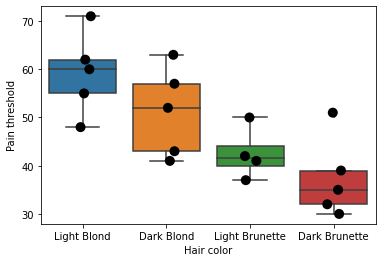

In [36]:
sns.boxplot(x='Hair color', y='Pain threshold', data=data)
sns.stripplot(x='Hair color', y='Pain threshold', data=data, color='black', size=10);

### Using pingouin

In [6]:
# 1. This is a between subject design, so the first step is to test for equality of variances
pg.homoscedasticity(data=data, dv='Pain threshold', group='Hair color')

,W,pval,equal_var
levene,0.392743,0.760016,True


In [18]:
# 2. If the groups have equal variances, we can use a regular one-way ANOVA
aov = pg.anova(
    data=data,
    dv='Pain threshold',
    between='Hair color',
    detailed=True
)
aov.round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Hair color,1360.726,3,453.575,6.791,0.004,0.576
1,Within,1001.800,15,66.787,NaN,NaN,NaN


In [19]:
# Same but using a standard eta-squared instead of a partial eta-squared effect size. Also
# note how here we're using the anova function directly as a method (= built-in function)
# of our pandas dataframe. In that case, we don't have to specify data anymore.
data.anova(
    dv='Pain threshold',
    between='Hair color',
    detailed=False,
    effsize='n2',
)

,Source,ddof1,ddof2,F,p-unc,n2
0,Hair color,3,15,6.791407,0.004114,0.575962


In [17]:
# 3. If there is a main effect, we can proceed to post-hoc Tukey test
pg.pairwise_tukey(data=data, dv='Pain threshold', between='Hair color')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.168623,2.669957,0.074168,1.525213
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.168623,-1.547801,0.436903,-0.884182
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482153,1.586968,0.416008,0.946285
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.168623,-4.217758,0.003713,-2.409395
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482153,-0.930291,0.769703,-0.554719
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482153,3.046249,0.036653,1.816432


### Using scipy.stats

In [41]:
# The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.
F, p = stats.f_oneway(
    data[data['Hair color'] == 'Dark Blond']['Pain threshold'],
    data[data['Hair color'] == 'Dark Brunette']['Pain threshold'],
    data[data['Hair color'] == 'Light Blond']['Pain threshold'],
    data[data['Hair color'] == 'Light Brunette']['Pain threshold'],
)

print(f"F statistic = {F:.2f} with P value from the F distribution = {p:.4f}")

F statistic = 6.79 with P value from the F distribution = 0.0041


### Computed manually

In [26]:
k = data['Hair color'].nunique()      # number of conditions
N = len(data)                         # number of total values
m = data.groupby('Hair color').size() # number of values in each group

print(f"There are {k} different conditions, {N} total values and the following number of values in each group:\n", m)

There are 4 different conditions, 19 total values and the following number of values in each group:
 Hair color
Dark Blond        5
Dark Brunette     5
Light Blond       5
Light Brunette    4
dtype: int64


In [43]:
# total sum of squares
SST = (
    (data['Pain threshold'] - data['Pain threshold'].mean())**2
).sum()

print(f"total sum of squares (grandmean)= {SST:.1f}")

total sum of squares (grandmean)= 2362.5


In [44]:
SSW = (
    data.groupby('Hair color')['Pain threshold']
    .transform(lambda x: (x - x.mean())**2)
).sum()

print(f"sum of squares within groups (group means)= {SSW:.1f}")

sum of squares within groups (group means)= 1001.8


In [13]:
SSW/SST

0.7358517031678802

In [14]:
SSB = SST - SSW
SSB

3.7663400000000014

In [15]:
SSB/SST

0.26414829683211977

In [16]:
10.492/27

0.3885925925925926

In [17]:
3.766/2

1.883

In [18]:
F_ratio = 1.883/.389
F_ratio

4.840616966580977

In [19]:
dfn, dfd = 2, 27
p_value= stats.f.sf(F, dfn, dfd) # using here the 'survival function 1 - cdf()'
p_value

0.0159099583256229

We then fill the following table and then the ANOVA table:  

Hypothesis | Scatter from | Sum of squares | Percentage of variation | $R²$
---|---|---|---|---
Null | Grand mean | 14.258 | 100.0% |
Alternative | Group mean | 10.492 | 73.59% |
Difference | - | 3.766 | 26.41% | 0.2641  

Source of variation | Sum of squares | DF | MS | F ratio | P value
---|---|---|---|---|---
Between groups | 3.766 | 29-27 = 2 | 1.883 | 4.841 | 0.0159
+ Within groups | 10.492 | N-k = 27 | 0.389 | 
= Total | 14.258 | N-1 (grandmean) = 29 |

#### Effect size
$\eta²$ = R²  
R² measures of much variance is explained by the model.  
R² = SSB / SST

In [20]:
3.766/14.258

0.2641324168887642

Omega squared (ω2) is a measure of effect size, or the degree of association for a population. It is an estimate of **how much variance in the response variables are accounted for by the explanatory variables**. Omega squared is widely viewed as a lesser biased alternative to eta-squared, especially when sample sizes are small. Zero indicates no effect.
$$
\omega² = \frac{SSB-(DF_B * MS_W)}{SST + MS_W}
$$

In [21]:
omega2 = (SSB - (2*.389)) / (SST + .389)
omega2

0.20401804275562346

### statsmodels

In [22]:
import statsmodels.sandbox.stats as sandbox_stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weight ~ group', data=data).fit() # we use OLS regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.846
Date:                Thu, 15 Nov 2018   Prob (F-statistic):             0.0159
Time:                        13:23:16   Log-Likelihood:                -26.810
No. Observations:                  30   AIC:                             59.62
Df Residuals:                      27   BIC:                             63.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0320      0.197     25.527      0.000       4.628       5.436
group[T.trt1]    -0.3710      0.279     -1.331      0.194      -0.943       0.201
group[T.trt2]     0.4940      0.279      1.772      0.088      -0.078       1.066
==============================================================================
Omnibus:                        1.835   Durbin-Watson:                   2.704
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.406
Skew:                           0.524   Prob(JB):                        0.495
Kurtosis:                       2.835   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
group,3.76634,2.0,4.846088,0.01591
Residual,10.49209,27.0,NaN,NaN


# Two-way ANOVA

The data are divided in two ways because each data point is either from an animal given either an inactive or active treatment (one factor) given for either a short or long duration (second factor). If male and female animals were both included you'd need three-way ANOVA.

Two-way ANOVA simultaneously tests 3 null hypotheses and so computes 3 P values:
1. there is no interaction between the two factors (treatment and duration);
2. the population means are identical for animals given placebo and active treatment (treatment), pooling short+log duration;
3. the population means are identical for animals given a treatment for short vs. long duration (duration).

Source of variation | Sum of squares | DF | MS
---|---|---|---
Interaction | 12896 | 1 | 12896 
+ Between rows | 5764 | 1 | 5764
+ Between columns | 3710 | 1 | 3710
+ Among replicates (residual) | 928 | 8 | 116
= Total | 23298 | 11

# Multiple comparison tests after ANOVA

The goal is to compare every mean with every other mean. The results of Tukey (or more generally Tuker-Kramer test which allows for unequal sample size) include:
- both CIs,
- conclusions about statistical significance 

In [24]:
mult_comp = sm.stats.multicomp.MultiComparison(data['weight'], data['group'])

## Tukey

In [25]:
print(mult_comp.tukeyhsd()) # P values are computed but not displayed

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 ctrl   trt1   -0.371  -1.0621 0.3201 False 
 ctrl   trt2   0.494   -0.1971 1.1851 False 
 trt1   trt2   0.865    0.1739 1.5561  True 
--------------------------------------------


These are multiple comparisons CIs, so the 95% confidence level applies to the entire family of comparisons, rather than to each individual interval. There is a 95% change that all three of these CIs include the true population value, leaving a 5% chance that any one or more of the intervals does not include the population value.  
If a 95% CI for the difference between two means include zero ($H_0$) then the difference is not statistically significant (P>0.05).  
The 5% significance level is a **familywise significance level**, meaning that it applies to the entire set of comparisons. If the null hypothesis is true, there is a 5% chance that one or more of the comparisaons will be statistically significant. The _yes/no_ conclusions apply to each comparison individually.

In [26]:
print(mult_comp.groupstats.groupmean)

[5.032 4.661 5.526]


In [27]:
mult_comp_2 = sm.stats.multicomp.pairwise_tukeyhsd(data['weight'], data['group'])
# Tukey’s Honestly Significant Difference
mult_comp_2.summary()

group1,group2,meandiff,lower,upper,reject
ctrl,trt1,-0.371,-1.0621,0.3201,False
ctrl,trt2,0.494,-0.1971,1.1851,False
trt1,trt2,0.865,0.1739,1.5561,True


In [28]:
np.diff(mult_comp_2.confint) # same CI for all three comparisons (see end of this part), here n=10 in all groups

array([[1.38217336],
       [1.38217336],
       [1.38217336]])

When computing most multiple comparisons tests, the SD for difference between 2 means is not computed from the SDs of those two groups but rather from the pooled SD of all the groups. The margin of error of the CI is computed by multiplying the SE of the difference by a critical value that depends on the choice of test, the number of df, the degree of confidence desired and the number of comparisons:
$$
\bar{y_i} - \bar{y_j} \pm t_{1-\alpha/2}\sqrt{\frac{SSE}{n-k}\left(\frac{1}{n_i}+\frac{1}{n_j}\right)}
$$
and $MSE = SSE/(n-k) = s_p²$ (pooled variance)

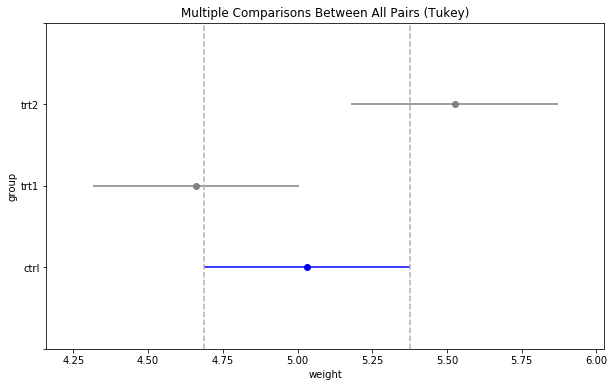

In [29]:
_ = mult_comp_2.plot_simultaneous(comparison_name='ctrl', xlabel='weight', ylabel='group')

## Dunnett's test
Compares the mean of each group to the mean of a control group without comparing the other groups among themselves. The test makes fewer comparisons than Tukey's method, so it generates narrower CIs and has more power to detect differences.

In [30]:
# there is nothing well established in Python, so let's use R
import rpy2.ipython
%load_ext rpy2.ipython

In [31]:
%%R
print(head(data))

This is not working, better to switch to a different notebook dedicated to analyses using R.

## Bonferroni's test
Bonferroni's multiple comparisons test should be used when the experiment design requires comparing only selected pairs of means (different from Tukey -> all vs. all, and Dunnett -> all vs. control).

results = mult_comp.allpairtest(stats.ttest_ind, method='bonf')
results[0]

In [32]:
p_val_adj = .05 / 3
p_val_adj

0.016666666666666666

In [33]:
res = stats.ttest_ind(data[data['group'] == 'ctrl']['weight'],
                     data[data['group'] == 'trt1']['weight'])
res

Ttest_indResult(statistic=1.1912603818487009, pvalue=0.2490231659730067)

In [34]:
res.pvalue <= p_val_adj

False

The individual t-tests that are conducted have to have a p-value less than 0.01667 in order to be considered significant.

In [38]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [41]:
multipletests([.05, 0.3, 0.01], alpha=.05, method='bonferroni')

(array([False, False,  True]),
 array([0.15, 0.9 , 0.03]),
 0.016952427508441503,
 0.016666666666666666)

### allpairtest

In [100]:
mult_comp.allpairtest(stats.ttest_ind, method='bonf')[0]

group1,group2,stat,pval,pval_corr,reject
ctrl,trt1,1.1913,0.249,0.7471,False
ctrl,trt2,-2.134,0.0469,0.1406,False
trt1,trt2,-3.0101,0.0075,0.0226,True


The pairwise.ttest for independent samples in R, as well as the Tukey HSD test in both R and statsmoldels, use the **joint variance across all samples**, while the pairwise ttest calculates the joint variance estimate for each pair of sample separately. _stats.ttest_ind_ just looks at one pair at a time:  

```Rscipt
pairwise.t.test(data$weight, data$group, p.adj = "bonferroni")

data:  data$weight and data$group 

     ctrl  trt1 
trt1 0.583 -    
trt2 0.263 0.013

P value adjustment method: bonferroni
```

In [5]:
# use scikit_posthocs instead
import scikit_posthocs as sp
print(sp.posthoc_ttest(data, 'weight', 'group', pool_sd=True, p_adjust='b'))

          ctrl      trt1      trt2
ctrl -1.000000  0.583164  0.263045
trt1  0.583164 -1.000000  0.013378
trt2  0.263045  0.013378 -1.000000


## Holm adjustment
The Holm adjustment sequentially compares the lowest p-value with a Type I error rate that is reduced for each consecutive test. In our case, this means that our first p-value is tested at the .05/3 level (.017), second at the .05/2 level (.025), and third at the .05/1 level (.05). This method is generally considered superior to the Bonferroni adjustment.

In [97]:
mult_comp.allpairtest(stats.ttest_ind, method='h')[0]

group1,group2,stat,pval,pval_corr,reject
ctrl,trt1,1.1913,0.249,0.249,False
ctrl,trt2,-2.134,0.0469,0.0937,False
trt1,trt2,-3.0101,0.0075,0.0226,True
